# 1. 데이터 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import timedelta, datetime, time
from tqdm.notebook import tqdm

In [2]:
airport = pd.read_excel('C:/Users/user/1. collabo/final/2020.11.06/Airport_ALL.xlsx')

In [3]:
airport

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE
0,AAR8901_71BD94_20190618,2019-06-19,06:13:55.621000,1500,NaN,NaN,37.57887,126.76762,NaN
1,AAR8901_71BD94_20190618,2019-06-19,06:14:16.644000,2425,NaN,NaN,37.59004,126.75266,NaN
2,AAR8901_71BD94_20190618,2019-06-19,06:14:38.806000,3300,NaN,NaN,37.60208,126.73635,NaN
3,AAR8901_71BD94_20190618,2019-06-19,06:14:59.965000,3800,NaN,NaN,37.61357,126.72005,NaN
4,AAR8901_71BD94_20190618,2019-06-19,06:15:20.905000,4175,NaN,NaN,37.62231,126.69690,NaN
...,...,...,...,...,...,...,...,...,...
450347,KAL1289_71BD60_20200822,2020-08-22,11:19:38.919000,22100,391.0,186.0,36.41949,126.47833,2944.0
450348,KAL1289_71BD60_20200822,2020-08-22,11:20:20.921000,23750,399.0,185.0,36.33943,126.46992,1408.0
450349,KAL1289_71BD60_20200822,2020-08-22,11:20:41.820000,24000,414.0,186.0,36.31894,126.46760,768.0
450350,KAL1289_71BD60_20200822,2020-08-22,11:21:48.543000,24000,435.0,187.0,36.17088,126.44926,0.0


In [4]:
#sns.boxplot(data = airport)

### SID 리스트(원본)

In [5]:
SID_list = airport.drop_duplicates('SID', keep = 'first').SID.tolist()

In [6]:
len(SID_list)

5445

# 2. 김포 -> 제주 운항이 아닌 거 추출(제거)

## 2-1. 출발 지점  이상치 확인


AxesSubplot(0.125,0.125;0.775x0.755)
Q1 :  37.54019
Q3 :  37.6164
LC :  37.425875000000005
UC :  37.73071499999999


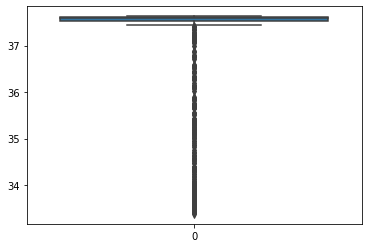

In [7]:
start_lat = pd.DataFrame(columns = ['start'])

for SID in tqdm(SID_list):
    a = airport[airport.SID == SID]
    tmp = a['LATITUDE'].iloc[0]
    start_lat = start_lat.append(pd.DataFrame([tmp], columns = ['start']))
    
start_lat = start_lat.reset_index(drop = True)

print(sns.boxplot(data = start_lat['start']))


q1 = start_lat['start'].quantile(0.25)  #하위 25%
q3 = start_lat['start'].quantile(0.75)  #하위 75%
iqr = q3 - q1 
lc = q1 - 1.5*iqr  #하위 이상치는 lc보다 작은 값
uc = q3 + 1.5*iqr  #상위 이상치는 uc보다 큰 

print('Q1 : ', q1)
print('Q3 : ', q3)
print('LC : ', lc)
print('UC : ', uc)

In [8]:
start_lat['start'].describe()

count    5445.000000
mean       37.336188
std         0.922101
min        33.380560
25%        37.540190
50%        37.598190
75%        37.616400
max        37.632660
Name: start, dtype: float64

In [9]:
airport_gimpo = airport.copy()

for SID in tqdm(SID_list):
    a = airport[airport.SID == SID]
    if a['LATITUDE'].iloc[0] > uc or a['LATITUDE'].iloc[0] < lc :
        airport_gimpo = airport_gimpo.drop(airport[airport.SID == SID].index)
        
        print(SID)
        
type(airport_gimpo)

JJA101_71C049_20200509
KAL1201_71C093_20191101
KAL1201_71BD68_20191208
KAL1201_71BF25_20200521
KAL1203_71BF08_20190626
KAL1203_71BF07_20190704
KAL1203_71BD99_20190902
KAL1203_71BF25_20190915
KAL1203_71BF24_20191002
KAL1203_71BD31_20191101
KAL1203_71BD74_20191102
KAL1203_71BD60_20191104
KAL1203_71BD31_20191105
KAL1203_71BD68_20191106
KAL1203_71BD68_20191107
KAL1203_71BF18_20191108
KAL1203_71BF14_20191109
KAL1203_71BF64_20191110
KAL1203_71BF57_20191111
KAL1203_71BD68_20191114
KAL1203_71BF18_20191115
KAL1203_71BF14_20191116
KAL1203_71BF51_20191117
KAL1203_71BD66_20191118
KAL1203_71BF21_20191119
KAL1203_71BD68_20191120
KAL1203_71BD66_20191121
KAL1203_71BF25_20191122
KAL1203_71BF21_20191123
KAL1203_71BD74_20191124
KAL1203_71BD66_20191125
KAL1203_71BD74_20191126
KAL1203_71BD66_20191127
KAL1203_71BD60_20191128
KAL1203_71BF27_20191129
KAL1203_71BF21_20191130
KAL1203_71BD74_20191201
KAL1203_71BD66_20191202
KAL1203_71BF14_20191203
KAL1203_71BF21_20191204
KAL1203_71BD66_20191205
KAL1203_71BF04_20

pandas.core.frame.DataFrame

In [10]:
airport_gimpo = airport_gimpo.reset_index().drop('index', axis = 1)

In [11]:
airport_gimpo

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE
0,AAR8901_71BD94_20190618,2019-06-19,06:13:55.621000,1500,NaN,NaN,37.57887,126.76762,NaN
1,AAR8901_71BD94_20190618,2019-06-19,06:14:16.644000,2425,NaN,NaN,37.59004,126.75266,NaN
2,AAR8901_71BD94_20190618,2019-06-19,06:14:38.806000,3300,NaN,NaN,37.60208,126.73635,NaN
3,AAR8901_71BD94_20190618,2019-06-19,06:14:59.965000,3800,NaN,NaN,37.61357,126.72005,NaN
4,AAR8901_71BD94_20190618,2019-06-19,06:15:20.905000,4175,NaN,NaN,37.62231,126.69690,NaN
...,...,...,...,...,...,...,...,...,...
424811,KAL1289_71BD60_20200822,2020-08-22,11:19:38.919000,22100,391.0,186.0,36.41949,126.47833,2944.0
424812,KAL1289_71BD60_20200822,2020-08-22,11:20:20.921000,23750,399.0,185.0,36.33943,126.46992,1408.0
424813,KAL1289_71BD60_20200822,2020-08-22,11:20:41.820000,24000,414.0,186.0,36.31894,126.46760,768.0
424814,KAL1289_71BD60_20200822,2020-08-22,11:21:48.543000,24000,435.0,187.0,36.17088,126.44926,0.0


### SID 리스트(김포->제주)

In [12]:
SID_list = airport_gimpo.drop_duplicates('SID', keep = 'first').SID.tolist()

In [13]:
len(SID_list)

5029


AxesSubplot(0.125,0.125;0.775x0.755)


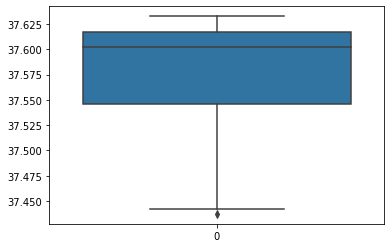

In [14]:
start_list=[]

for SID in tqdm(SID_list):
    a = airport_gimpo[airport_gimpo.SID == SID]
    s_lat = a['LATITUDE'].iloc[0]
    start_list.append(s_lat)

print(sns.boxplot(data = start_list))
#min(start_list)

## 2-2. 도착 지점  이상치 확인 


AxesSubplot(0.125,0.125;0.775x0.755)
33.47923
33.95464
32.766115000000006
34.66775499999999


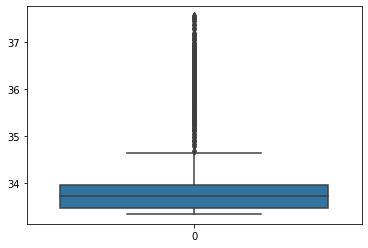

In [15]:
last_lat = pd.DataFrame(columns = ['last'])

for SID in tqdm(SID_list):
    a = airport_gimpo[airport_gimpo.SID == SID]
    tmp = a['LATITUDE'].iloc[-1]
    last_lat = last_lat.append(pd.DataFrame([tmp], columns = ['last']))
    
last_lat = last_lat.reset_index(drop = True)
print(sns.boxplot(data = last_lat['last']))

q1 = last_lat['last'].quantile(0.25)  #하위 25%
q3 = last_lat['last'].quantile(0.75)  #하위 75%
iqr = q3 - q1 
lc = q1 - 1.5*iqr  #하위 이상치는 lc보다 작은 값
uc = q3 + 1.5*iqr  #상위 이상치는 uc보다 큰 

print(q1)
print(q3)
print(lc)
print(uc)

In [16]:
last_lat['last'].describe()

count    5029.000000
mean       34.011347
std         0.876437
min        33.347120
25%        33.479230
50%        33.719600
75%        33.954640
max        37.556860
Name: last, dtype: float64

In [17]:
airport_gimpo_out = airport_gimpo.copy()

for SID in tqdm(SID_list):
    a = airport_gimpo[airport_gimpo.SID == SID]
    if a['LATITUDE'].iloc[-1] > uc or a['LATITUDE'].iloc[-1] < lc :
        airport_gimpo_out = airport_gimpo_out.drop(airport_gimpo[airport_gimpo.SID == SID].index)
        
        print(SID)
        
type(airport_gimpo_out)

AAR8901_71C277_20200522
AAR8901_71C074_20200523
AAR8901_71C060_20200524
AAR8901_71BF03_20200525
AAR8901_71BF03_20200527
AAR8901_71C074_20200528
AAR8901_71BF03_20200529
AAR8901_71C059_20200530
AAR8901_71BF03_20200531
AAR8901_71C004_20200601
AAR8901_71BF03_20200602
AAR8901_71C277_20200603
AAR8901_71C059_20200629
AAR8901_71BF88_20200630
AAR8901_71BF37_20200701
AAR8901_71BF72_20200703
AAR8901_71BF72_20200819
AAR8901_71C277_20200820
AAR8901_71BF88_20200821
AAR8901_71C277_20200822
AAR8901_71BF37_20200823
JJA101_71C301_20200522
JJA101_71C296_20200523
JJA101_71C334_20200524
JJA101_71C206_20200525
JJA101_71C296_20200526
JJA101_71C295_20200527
JJA101_71C032_20200528
JJA101_71C305_20200529
JJA101_71C033_20200530
JJA101_71C206_20200531
JJA101_71C031_20200601
JJA101_71C033_20200602
JJA101_71C031_20200603
JJA101_71C032_20200629
JJA101_71C296_20200630
JJA101_71C064_20200701
JJA101_71C331_20200703
JJA101_71C334_20200819
JJA101_71C336_20200820
JJA101_71C295_20200821
JJA101_71C032_20200822
JJA101_71C331

pandas.core.frame.DataFrame

In [18]:
airport_gimpo_out = airport_gimpo_out.reset_index().drop('index', axis = 1)

In [19]:
airport_gimpo_out

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE
0,AAR8901_71BD94_20190618,2019-06-19,06:13:55.621000,1500,NaN,NaN,37.57887,126.76762,NaN
1,AAR8901_71BD94_20190618,2019-06-19,06:14:16.644000,2425,NaN,NaN,37.59004,126.75266,NaN
2,AAR8901_71BD94_20190618,2019-06-19,06:14:38.806000,3300,NaN,NaN,37.60208,126.73635,NaN
3,AAR8901_71BD94_20190618,2019-06-19,06:14:59.965000,3800,NaN,NaN,37.61357,126.72005,NaN
4,AAR8901_71BD94_20190618,2019-06-19,06:15:20.905000,4175,NaN,NaN,37.62231,126.69690,NaN
...,...,...,...,...,...,...,...,...,...
402369,KAL1287_71BF06_20200429,2020-04-29,09:45:06.246000,14300,356.0,185.0,34.12340,126.59649,-1024.0
402370,KAL1287_71BF06_20200429,2020-04-29,09:46:51.911000,12650,323.0,219.0,33.96666,126.55392,-640.0
402371,KAL1287_71BF06_20200429,2020-04-29,09:47:15.059000,12400,307.0,219.0,33.93512,126.52371,-640.0
402372,KAL1287_71BF06_20200429,2020-04-29,09:47:35.986000,12225,293.0,219.0,33.91293,126.50248,-512.0


In [20]:
SID_list = airport_gimpo_out.drop_duplicates('SID', keep = 'first').SID.to_list()

In [21]:
len(SID_list)

4357


AxesSubplot(0.125,0.125;0.775x0.755)


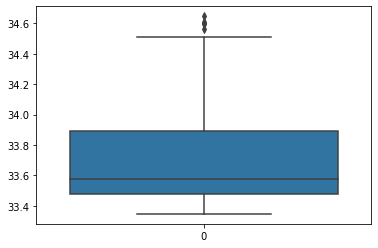

In [22]:
last_list = []

for SID in tqdm(SID_list):
    a = airport_gimpo_out[airport_gimpo_out.SID == SID]
    s_lat = a['LATITUDE'].iloc[-1]
    last_list.append(s_lat)

print(sns.boxplot(data = last_list))

# 3. 비정상적인 운항 제거

In [23]:
len(SID_list)

4357


AxesSubplot(0.125,0.125;0.775x0.755)
2265.336
3141.539
951.0314999999991
4455.843500000001


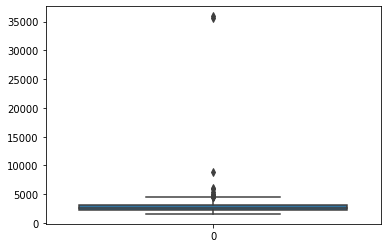

In [24]:
AVG_time = pd.DataFrame(columns = ['time'])

for SID in tqdm(SID_list):
    a = airport_gimpo_out[airport_gimpo_out.SID == SID]
    s = a['GENERATEDDATE'].iloc[0].strftime('%Y-%m-%d') + a['GENERATEDTIME'].iloc[0].strftime('%H:%M:%S.%f')
    t1 = datetime.strptime(s, "%Y-%m-%d%H:%M:%S.%f")

    e = a['GENERATEDDATE'].iloc[-1].strftime('%Y-%m-%d') + a['GENERATEDTIME'].iloc[-1].strftime('%H:%M:%S.%f')
    t2 = datetime.strptime(e, "%Y-%m-%d%H:%M:%S.%f")
    tmp = t2 - t1
    tmp = tmp.total_seconds() 
    AVG_time = AVG_time.append(pd.DataFrame([tmp], columns = ['time']))
    
AVG_time = AVG_time.reset_index(drop = True)
print(sns.boxplot(data = AVG_time['time']))

q1 = AVG_time['time'].quantile(0.25)
q3 = AVG_time['time'].quantile(0.75)
iqr = q3 - q1
lc = q1 - 1.5*iqr  #하위 이상치는 lc보다 작은 값
uc = q3 + 1.5*iqr  #상위 이상치는 uc보다 큰 

print(q1)
print(q3)
print(lc)
print(uc)

In [25]:
AVG_time['time'].describe()

count     4357.000000
mean      2755.863725
std        899.640045
min       1575.184000
25%       2265.336000
50%       2688.878000
75%       3141.539000
max      35933.681000
Name: time, dtype: float64

In [26]:
airport_normal = airport_gimpo_out.copy()

for SID in tqdm(SID_list):
    a = airport_gimpo_out[airport_gimpo_out.SID == SID]
    
    s = a['GENERATEDDATE'].iloc[0].strftime('%Y-%m-%d') + a['GENERATEDTIME'].iloc[0].strftime('%H:%M:%S.%f')
    t1 = datetime.strptime(s, "%Y-%m-%d%H:%M:%S.%f")

    e = a['GENERATEDDATE'].iloc[-1].strftime('%Y-%m-%d') + a['GENERATEDTIME'].iloc[-1].strftime('%H:%M:%S.%f')
    t2 = datetime.strptime(e, "%Y-%m-%d%H:%M:%S.%f")
    
    if t2 - t1 > timedelta(seconds = uc) or t2 - t1 < timedelta(seconds = lc):
        airport_normal = airport_normal.drop(airport_gimpo_out[airport_gimpo_out.SID == SID].index)
        
        print(SID)


type(airport_normal)

AAR8901_71BF03_20190810
KAL1201_71BD60_20190810
KAL1203_71BF07_20190703
KAL1203_71BF28_20190811
KAL1213_71BF07_20191002
KAL1215_71C092_20190827
KAL1221_71BF18_20190612
KAL1231_71C314_20190816
KAL1235_71BF66_20190612
KAL1241_71BF28_20191001
KAL1243_71BF06_20190802
KAL1247_71BF51_20190921
KAL1257_71BD53_20190811
KAL1263_71BD68_20190811
KAL1263_71BF06_20191003



pandas.core.frame.DataFrame

In [27]:
airport_normal = airport_normal.reset_index().drop('index', axis = 1)

In [28]:
airport_normal

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE
0,AAR8901_71BD94_20190618,2019-06-19,06:13:55.621000,1500,NaN,NaN,37.57887,126.76762,NaN
1,AAR8901_71BD94_20190618,2019-06-19,06:14:16.644000,2425,NaN,NaN,37.59004,126.75266,NaN
2,AAR8901_71BD94_20190618,2019-06-19,06:14:38.806000,3300,NaN,NaN,37.60208,126.73635,NaN
3,AAR8901_71BD94_20190618,2019-06-19,06:14:59.965000,3800,NaN,NaN,37.61357,126.72005,NaN
4,AAR8901_71BD94_20190618,2019-06-19,06:15:20.905000,4175,NaN,NaN,37.62231,126.69690,NaN
...,...,...,...,...,...,...,...,...,...
400275,KAL1287_71BF06_20200429,2020-04-29,09:45:06.246000,14300,356.0,185.0,34.12340,126.59649,-1024.0
400276,KAL1287_71BF06_20200429,2020-04-29,09:46:51.911000,12650,323.0,219.0,33.96666,126.55392,-640.0
400277,KAL1287_71BF06_20200429,2020-04-29,09:47:15.059000,12400,307.0,219.0,33.93512,126.52371,-640.0
400278,KAL1287_71BF06_20200429,2020-04-29,09:47:35.986000,12225,293.0,219.0,33.91293,126.50248,-512.0


### SID 리스트(김포->제주, 정상운행)

In [29]:
SID_list = airport_normal.drop_duplicates('SID', keep = 'first').SID.tolist()

In [30]:
len(SID_list)

4342

# 4. 각 안테나 지점의 Access Point 계산

In [31]:
airport_ap = airport_normal.copy()

In [32]:
#김포 안테나 제거
"""
airport_ap['RKSS_AP'] = pd.Series()

for i in range(len(airport_ap)):
    airport_ap.RKSS_AP[i] = abs(airport_ap['LATITUDE'][i] - 37.5587)
    #airport_ap.RKSS_AP[i] = abs(airport_ap['LATITUDE'][i] - airport_ap['RKSS'][i])
"""

"\nairport_ap['RKSS_AP'] = pd.Series()\n\nfor i in range(len(airport_ap)):\n    airport_ap.RKSS_AP[i] = abs(airport_ap['LATITUDE'][i] - 37.5587)\n    #airport_ap.RKSS_AP[i] = abs(airport_ap['LATITUDE'][i] - airport_ap['RKSS'][i])\n"

In [33]:
airport_ap['BULTI_AP'] = pd.Series()

for i in tqdm(range(len(airport_ap))):
    airport_ap.BULTI_AP[i] = abs(airport_ap['LATITUDE'][i] - 36.7229)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
airport_ap['BEDES_AP'] = pd.Series()

for i in tqdm(range(len(airport_ap))):
    airport_ap.BEDES_AP[i] = abs(airport_ap['LATITUDE'][i] - 36.1514)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
airport_ap['MANGI_AP'] = pd.Series()

for i in tqdm(range(len(airport_ap))):
    airport_ap.MANGI_AP[i] = abs(airport_ap['LATITUDE'][i] - 35.5031)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
airport_ap['DALSU_AP'] = pd.Series()

for i in tqdm(range(len(airport_ap))):
    airport_ap.DALSU_AP[i] = abs(airport_ap['LATITUDE'][i] - 35.1253)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
airport_ap['DOTOL_AP'] = pd.Series()

for i in tqdm(range(len(airport_ap))):
    airport_ap.DOTOL_AP[i] = abs(airport_ap['LATITUDE'][i] - 34.2543)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
#제주도 안테나 제거
"""
airport_ap['RKPC_AP'] = pd.Series()

for i in range(len(airport_ap)):
    airport_ap.RKPC_AP[i] = abs(airport_ap['LATITUDE'][i] - 33.5090)
    #airport_ap.RKPC_AP[i] = abs(airport_ap['LATITUDE'][i] - airport_ap['RKPC'][i])
"""

"\nairport_ap['RKPC_AP'] = pd.Series()\n\nfor i in range(len(airport_ap)):\n    airport_ap.RKPC_AP[i] = abs(airport_ap['LATITUDE'][i] - 33.5090)\n    #airport_ap.RKPC_AP[i] = abs(airport_ap['LATITUDE'][i] - airport_ap['RKPC'][i])\n"

In [39]:
airport_ap

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE,BULTI_AP,BEDES_AP,MANGI_AP,DALSU_AP,DOTOL_AP
0,AAR8901_71BD94_20190618,2019-06-19,06:13:55.621000,1500,NaN,NaN,37.57887,126.76762,NaN,0.85597,1.42747,2.07577,2.45357,3.32457
1,AAR8901_71BD94_20190618,2019-06-19,06:14:16.644000,2425,NaN,NaN,37.59004,126.75266,NaN,0.86714,1.43864,2.08694,2.46474,3.33574
2,AAR8901_71BD94_20190618,2019-06-19,06:14:38.806000,3300,NaN,NaN,37.60208,126.73635,NaN,0.87918,1.45068,2.09898,2.47678,3.34778
3,AAR8901_71BD94_20190618,2019-06-19,06:14:59.965000,3800,NaN,NaN,37.61357,126.72005,NaN,0.89067,1.46217,2.11047,2.48827,3.35927
4,AAR8901_71BD94_20190618,2019-06-19,06:15:20.905000,4175,NaN,NaN,37.62231,126.69690,NaN,0.89941,1.47091,2.11921,2.49701,3.36801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400275,KAL1287_71BF06_20200429,2020-04-29,09:45:06.246000,14300,356.0,185.0,34.12340,126.59649,-1024.0,2.59950,2.02800,1.37970,1.00190,0.13090
400276,KAL1287_71BF06_20200429,2020-04-29,09:46:51.911000,12650,323.0,219.0,33.96666,126.55392,-640.0,2.75624,2.18474,1.53644,1.15864,0.28764
400277,KAL1287_71BF06_20200429,2020-04-29,09:47:15.059000,12400,307.0,219.0,33.93512,126.52371,-640.0,2.78778,2.21628,1.56798,1.19018,0.31918
400278,KAL1287_71BF06_20200429,2020-04-29,09:47:35.986000,12225,293.0,219.0,33.91293,126.50248,-512.0,2.80997,2.23847,1.59017,1.21237,0.34137


In [40]:
airport_ap['BULTI_AP'].describe()

count    400280.000000
mean          1.398058
std           0.990200
min           0.000000
25%           0.562190
50%           1.110460
75%           2.243870
max           5.516190
Name: BULTI_AP, dtype: float64

In [41]:
airport_ap['BEDES_AP'].describe()

count    400280.000000
mean          1.209422
std           0.733544
min           0.000000
25%           0.633860
50%           1.158920
75%           1.672370
max           4.944690
Name: BEDES_AP, dtype: float64

In [42]:
airport_ap['MANGI_AP'].describe()

count    400280.000000
mean          1.151565
std           0.636913
min           0.000000
25%           0.598015
50%           1.199605
75%           1.717355
max           4.296390
Name: MANGI_AP, dtype: float64

In [43]:
airport_ap['DALSU_AP'].describe()

count    400280.000000
mean          1.197465
std           0.727132
min           0.000010
25%           0.569265
50%           1.151370
75%           1.750220
max           3.918590
Name: DALSU_AP, dtype: float64

In [44]:
airport_ap['DOTOL_AP'].describe()

count    400280.000000
mean          1.545771
std           1.092352
min           0.000000
25%           0.548200
50%           1.358160
75%           2.613530
max           3.381930
Name: DOTOL_AP, dtype: float64

## 4-1. 각 AP 최소값이 0.05 이하인 운항 구하기

In [45]:
airport_apmin = pd.DataFrame()

for SID in tqdm(SID_list):
    a = airport_ap[airport_ap.SID == SID]
    if a['BULTI_AP'].min() < 0.05 and a['BEDES_AP'].min() < 0.05 and a['MANGI_AP'].min() < 0.05 and a['DALSU_AP'].min() < 0.05 and a['DOTOL_AP'].min() < 0.05 :
        airport_apmin = pd.concat([airport_apmin, a[a['BULTI_AP'] == a['BULTI_AP'].min()]], axis = 0)
        airport_apmin = pd.concat([airport_apmin, a[a['BEDES_AP'] == a['BEDES_AP'].min()]], axis = 0)
        airport_apmin = pd.concat([airport_apmin, a[a['MANGI_AP'] == a['MANGI_AP'].min()]], axis = 0)
        airport_apmin = pd.concat([airport_apmin, a[a['DALSU_AP'] == a['DALSU_AP'].min()]], axis = 0)
        airport_apmin = pd.concat([airport_apmin, a[a['DOTOL_AP'] == a['DOTOL_AP'].min()]], axis = 0)

In [46]:
airport_apmin = airport_apmin.reset_index().drop('index', axis = 1)

In [47]:
airport_apmin

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE,BULTI_AP,BEDES_AP,MANGI_AP,DALSU_AP,DOTOL_AP
0,AAR8901_71BD94_20190618,2019-06-19,06:24:47.679000,23000,NaN,NaN,36.71389,126.69141,NaN,0.00901,0.56249,1.21079,1.58859,2.45959
1,AAR8901_71BD94_20190618,2019-06-19,06:28:59.800000,28000,NaN,NaN,36.16885,126.67283,NaN,0.55405,0.01745,0.66575,1.04355,1.91455
2,AAR8901_71BD94_20190618,2019-06-19,06:33:53.986000,28000,NaN,NaN,35.52786,126.65142,NaN,1.19504,0.62354,0.02476,0.40256,1.27356
3,AAR8901_71BD94_20190618,2019-06-19,06:36:41.780000,26275,NaN,NaN,35.14764,126.63924,NaN,1.57526,1.00376,0.35546,0.02234,0.89334
4,AAR8901_71BD94_20190618,2019-06-19,06:43:41.889000,15625,NaN,NaN,34.27235,126.61087,NaN,2.45055,1.87905,1.23075,0.85295,0.01805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,KAL1287_71BF16_20200126,2020-01-26,07:29:08.232000,16000,373.0,190.0,36.72054,126.82874,0.0,0.00236,0.56914,1.21744,1.59524,2.46624
15363,KAL1287_71BF16_20200126,2020-01-26,07:34:23.934000,20000,394.0,186.0,36.15307,126.81250,0.0,0.56983,0.00167,0.64997,1.02777,1.89877
15364,KAL1287_71BF16_20200126,2020-01-26,07:40:20.984000,20000,393.0,186.0,35.50479,126.74237,0.0,1.21811,0.64661,0.00169,0.37949,1.25049
15365,KAL1287_71BF16_20200126,2020-01-26,07:43:50.882000,20000,388.0,186.0,35.12563,126.70173,0.0,1.59727,1.02577,0.37747,0.00033,0.87133


In [48]:
#airport_apmin.SID.value_counts().head(60)

In [49]:
#airport_apmin.RKSS_AP[::7].describe()

In [50]:
#airport_apmin.BULTI_AP[1::7].describe()

### SID 리스트(김포->제주, 정상운행, AP최소_0.05이하)

In [51]:
SID_list = airport_apmin.drop_duplicates('SID', keep = 'first').SID.tolist()

In [52]:
len(SID_list)

3073

In [53]:
len(SID_list)

3073

# 5. 출발, 도착 지점 행 추가

## 5-1. 출발 지점 고도 이상치 확인


AxesSubplot(0.125,0.125;0.775x0.755)
2275.0
4100.0
-462.5
6837.5


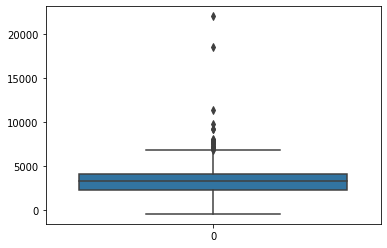

In [54]:
df_start_alt = pd.DataFrame(columns = ['start_alt'])

for SID in tqdm(SID_list):
    a = airport_ap[airport_ap.SID == SID]
    tmp = a['ALTITUDE'].iloc[0]
    df_start_alt = df_start_alt.append(pd.DataFrame([tmp], columns = ['start_alt']))
    
df_start_alt = df_start_alt.reset_index(drop = True)
print(sns.boxplot(data = df_start_alt['start_alt']))

start_q1 = df_start_alt['start_alt'].quantile(0.25)
start_q3 = df_start_alt['start_alt'].quantile(0.75)
start_iqr = start_q3 - start_q1
start_lc = start_q1 - 1.5*start_iqr  #하위 이상치는 lc보다 작은 값
start_uc = start_q3 + 1.5*start_iqr  #상위 이상치는 uc보다 큰 

print(start_q1)
print(start_q3)
print(start_lc)
print(start_uc)

## 5-2. 도착 지점 고도 이상치 확인


AxesSubplot(0.125,0.125;0.775x0.755)
1150.0
8900.0
-10475.0
20525.0


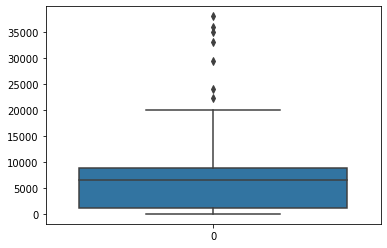

In [55]:
df_last_alt = pd.DataFrame(columns = ['last_alt'])

for SID in tqdm(SID_list):
    a = airport_ap[airport_ap.SID == SID]
    tmp = a['ALTITUDE'].iloc[-1]
    df_last_alt = df_last_alt.append(pd.DataFrame([tmp], columns = ['last_alt']))
    
df_last_alt = df_last_alt.reset_index(drop = True)
print(sns.boxplot(data = df_last_alt['last_alt']))

last_q1 = df_last_alt['last_alt'].quantile(0.25)
last_q3 = df_last_alt['last_alt'].quantile(0.75)
last_iqr = last_q3 - last_q1
last_lc = last_q1 - 1.5*last_iqr  #하위 이상치는 lc보다 작은 값
last_uc = last_q3 + 1.5*last_iqr  #상위 이상치는 uc보다 큰 

print(last_q1)
print(last_q3)
print(last_lc)
print(last_uc)

## 5-3. 이상치 기준으로 출발 및 도착 지점 행 추가

In [56]:
airport_startend = pd.DataFrame()
remove_sid = []

for SID in tqdm(SID_list):
    a = airport_ap[airport_ap.SID == SID]

    #최저안전고도 = 1000ft
    if (a.iloc[0].ALTITUDE >= 1000 and a.iloc[0].ALTITUDE <= start_q3 ) and (a.iloc[-1].ALTITUDE <= last_q3 and a.iloc[-1].ALTITUDE >= 1000):
        airport_startend = pd.concat([airport_startend, pd.DataFrame(a.iloc[0]).T, pd.DataFrame(a.iloc[-1]).T], axis = 0)
    else:
        remove_sid.append(a.SID.iloc[0])
    
for sid in remove_sid:
    airport_apmin = airport_apmin.drop(airport_apmin[airport_apmin.SID == sid].index)
    print(sid)
    
    
airport_startend = pd.concat([airport_startend, airport_apmin], axis = 0)   


AAR8901_71C277_20190706
AAR8901_71BF03_20190707
AAR8901_71C236_20190801
AAR8901_71BD94_20190805
AAR8901_71C236_20190807
AAR8901_71BD94_20190815
AAR8901_71C236_20190819
AAR8901_71BF03_20190822
AAR8901_71C236_20190825
AAR8901_71BF03_20190831
AAR8901_71BF03_20190902
AAR8901_71C236_20190904
AAR8901_71C278_20190907
AAR8901_71C236_20190909
AAR8901_71C278_20190910
AAR8901_71C018_20190912
AAR8901_71C018_20190914
AAR8901_71C236_20190919
AAR8901_71BF73_20190920
AAR8901_71C236_20190924
AAR8901_71BF03_20190925
AAR8901_71BD94_20190926
AAR8901_71C278_20190927
AAR8901_71C236_20190928
AAR8901_71BF03_20190929
AAR8901_71BD94_20191002
AAR8901_71BF03_20191007
AAR8901_71BD94_20191014
AAR8901_71BD94_20191017
AAR8901_71BF03_20191018
AAR8901_71BF03_20191020
AAR8901_71BF03_20191022
AAR8901_71C236_20191023
AAR8901_71BF03_20191025
AAR8901_71BF38_20191101
AAR8901_71BF73_20191102
AAR8901_71BF38_20191103
AAR8901_71BF88_20191106
AAR8901_71BF38_20191107
AAR8901_71BF73_20191108
AAR8901_71BF38_20191116
AAR8901_71BF73_

KAL1215_71BD69_20190930
KAL1215_71C315_20191001
KAL1215_71C093_20191006
KAL1215_71C314_20191008
KAL1215_71BD60_20191011
KAL1215_71BF19_20191012
KAL1215_71C313_20191014
KAL1215_71BD68_20191016
KAL1215_71C249_20191018
KAL1215_71BA01_20191020
KAL1215_71BD60_20191025
KAL1215_71BF16_20191027
KAL1215_71C093_20191029
KAL1215_71BD74_20191030
KAL1215_71BD99_20191031
KAL1215_71C314_20191103
KAL1215_71C314_20191109
KAL1215_71BF28_20191212
KAL1215_71C091_20191214
KAL1215_71C311_20191215
KAL1215_71C313_20191217
KAL1215_71C312_20191218
KAL1215_71BA00_20191221
KAL1215_71C311_20191222
KAL1215_71C311_20191224
KAL1215_71C312_20191225
KAL1215_71BF17_20191226
KAL1215_71C091_20191227
KAL1215_71C092_20200101
KAL1215_71BF05_20200102
KAL1215_71BD26_20200103
KAL1215_71C093_20200105
KAL1215_71BA01_20200108
KAL1215_71BF04_20200109
KAL1215_71BA00_20200110
KAL1215_71C314_20200111
KAL1215_71C093_20200115
KAL1215_71BA01_20200118
KAL1215_71C092_20200119
KAL1215_71BD26_20200120
KAL1215_71C311_20200121
KAL1215_71BF08_2

KAL1243_71BD99_20190825
KAL1243_71BF07_20190901
KAL1243_71BD66_20190904
KAL1243_71BF17_20190908
KAL1243_71C221_20190912
KAL1243_71C221_20190913
KAL1243_71BF24_20190915
KAL1243_71BD66_20190917
KAL1243_71BF16_20190918
KAL1243_71C092_20190919
KAL1243_71BD66_20190921
KAL1243_71BF57_20190924
KAL1243_71BD66_20190925
KAL1243_71BD66_20190927
KAL1243_71BD66_20190928
KAL1243_71BF18_20190929
KAL1243_71BF16_20191003
KAL1243_71BF05_20191006
KAL1243_71BF57_20191008
KAL1243_71C092_20191010
KAL1243_71C312_20191011
KAL1243_71BF27_20191013
KAL1243_71BD68_20191016
KAL1243_71BD60_20191023
KAL1243_71BA01_20191029
KAL1243_71C315_20191103
KAL1243_71BF26_20191104
KAL1243_71C092_20191124
KAL1243_71BD68_20191212
KAL1243_71C314_20191214
KAL1243_71BD66_20191215
KAL1243_71BF27_20191216
KAL1243_71C091_20191217
KAL1243_71BD66_20191222
KAL1243_71C092_20191224
KAL1243_71BD68_20191225
KAL1243_71BF17_20191227
KAL1243_71BF17_20191228
KAL1243_71BD69_20200104
KAL1243_71C091_20200105
KAL1243_71BD66_20200108
KAL1243_71BA00_2

In [57]:
airport_startend = airport_startend.sort_values(by = ['SID', 'GENERATEDDATE', 'GENERATEDTIME'], ascending = True).reset_index().drop('index',axis = 1)

In [58]:
#airport_startend.SID.value_counts()

In [59]:
#airport_startend[0:7]

In [60]:
#원래 AP 제거
#airport_startend.drop(['RKSS', 'BULTI', 'BEDES', 'MANGI', 'DALSU', 'DOTOL', 'RKPC'], axis = 1, inplace = True)

In [61]:
#airport_startend

### SID 리스트(김포->제주, 정상운행, AP최소_0.05이하, 출발/도착 지점 추가)

In [62]:
SID_list = airport_startend.drop_duplicates('SID', keep = 'first').SID.tolist()

In [63]:
len(SID_list)

1270

# 6. NULL값 운항 제거(GROUNDSPEED, TRACK)

In [64]:
airport_null = airport_startend.copy()

In [65]:
#airport_startend['TRACK'].value_counts(dropna = False) 

In [66]:
remove_sid = []

for SID in tqdm(SID_list):
    a = airport_null[airport_null.SID == SID]
    for i in a['GROUNDSPEED'].isnull():
        if i == True:
            remove_sid.append(SID)


for sid in set(remove_sid):
    airport_null = airport_null.drop(airport_null[airport_null.SID == sid].index)

In [67]:
airport_null = airport_null.reset_index(drop=True)

In [68]:
airport_null

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE,BULTI_AP,BEDES_AP,MANGI_AP,DALSU_AP,DOTOL_AP
0,AAR8901_71BF37_20200321,2020-03-21,21:17:13.219000,2525,147,314,37.5836,126.762,1984,0.86072,1.43222,2.08052,2.45832,3.32932
1,AAR8901_71BF37_20200321,2020-03-21,21:27:45.015000,27425,406,173,36.7311,126.822,1600,0.00815,0.57965,1.22795,1.60575,2.47675
2,AAR8901_71BF37_20200321,2020-03-21,21:33:00.043000,28000,405,186,36.1388,126.811,0,0.58407,0.01257,0.63573,1.01353,1.88453
3,AAR8901_71BF37_20200321,2020-03-21,21:38:36.701000,27975,409,186,35.5014,126.742,0,1.22145,0.64995,0.00165,0.37615,1.24715
4,AAR8901_71BF37_20200321,2020-03-21,21:41:54.882000,25725,383,186,35.1334,126.703,-2304,1.58951,1.01801,0.36971,0.00809,0.87909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,KAL1285_71BF04_20200123,2020-01-23,08:53:33.852000,22000,393,185,36.1701,126.814,0,0.55284,0.01866,0.66696,1.04476,1.91576
7752,KAL1285_71BF04_20200123,2020-01-23,08:59:51.794000,22000,398,186,35.4876,126.74,64,1.23534,0.66384,0.01554,0.36226,1.23326
7753,KAL1285_71BF04_20200123,2020-01-23,09:03:01.083000,21775,396,186,35.1374,126.703,-1152,1.58546,1.01396,0.36566,0.01214,0.88314
7754,KAL1285_71BF04_20200123,2020-01-23,09:11:45.727000,15275,340,185,34.2551,126.61,-704,2.46781,1.89631,1.24801,0.87021,0.00079


### SID 리스트(김포->제주, 정상운행, AP최소_0.05이하, 출발/도착 지점 추가, NULL값 제거)

In [69]:
SID_list = airport_null.drop_duplicates('SID', keep = 'first').SID.tolist()

In [70]:
len(SID_list)

1108

# 7. Elapsed 구하기

In [71]:
airport_time = airport_null.copy()

In [72]:
int_time_log = []
int_time_sec = []

for SID in tqdm(SID_list):
    a = airport_null[airport_null.SID == SID]
    for i in range(0, 7):
        if i == 0:
            s = a['GENERATEDDATE'].iloc[i].strftime('%Y-%m-%d') + a['GENERATEDTIME'].iloc[i].strftime('%H:%M:%S.%f')
            t1 = datetime.strptime(s, "%Y-%m-%d%H:%M:%S.%f")

            e = a['GENERATEDDATE'].iloc[i].strftime('%Y-%m-%d') + a['GENERATEDTIME'].iloc[i].strftime('%H:%M:%S.%f')
            t2 = datetime.strptime(e, "%Y-%m-%d%H:%M:%S.%f")

            int_log = t2 - t1

            int_time_log.append(int_log)
            int_time_sec.append(int_log.total_seconds())
            
        else:
            s = a['GENERATEDDATE'].iloc[0].strftime('%Y-%m-%d') + a['GENERATEDTIME'].iloc[0].strftime('%H:%M:%S.%f')
            t1 = datetime.strptime(s, "%Y-%m-%d%H:%M:%S.%f")

            e = a['GENERATEDDATE'].iloc[i].strftime('%Y-%m-%d') + a['GENERATEDTIME'].iloc[i].strftime('%H:%M:%S.%f')
            t2 = datetime.strptime(e, "%Y-%m-%d%H:%M:%S.%f")

            int_log = t2 - t1
            
            int_time_log.append(int_log)
            int_time_sec.append(int_log.total_seconds())

airport_time['ELASPED'] = int_time_log
airport_time['ELASPED_SECOND'] = int_time_sec

In [73]:
airport_time['ELASPED'][0]

Timedelta('0 days 00:00:00')

In [74]:
airport_time

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE,BULTI_AP,BEDES_AP,MANGI_AP,DALSU_AP,DOTOL_AP,ELASPED,ELASPED_SECOND
0,AAR8901_71BF37_20200321,2020-03-21,21:17:13.219000,2525,147,314,37.5836,126.762,1984,0.86072,1.43222,2.08052,2.45832,3.32932,00:00:00,0.000
1,AAR8901_71BF37_20200321,2020-03-21,21:27:45.015000,27425,406,173,36.7311,126.822,1600,0.00815,0.57965,1.22795,1.60575,2.47675,00:10:31.796000,631.796
2,AAR8901_71BF37_20200321,2020-03-21,21:33:00.043000,28000,405,186,36.1388,126.811,0,0.58407,0.01257,0.63573,1.01353,1.88453,00:15:46.824000,946.824
3,AAR8901_71BF37_20200321,2020-03-21,21:38:36.701000,27975,409,186,35.5014,126.742,0,1.22145,0.64995,0.00165,0.37615,1.24715,00:21:23.482000,1283.482
4,AAR8901_71BF37_20200321,2020-03-21,21:41:54.882000,25725,383,186,35.1334,126.703,-2304,1.58951,1.01801,0.36971,0.00809,0.87909,00:24:41.663000,1481.663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,KAL1285_71BF04_20200123,2020-01-23,08:53:33.852000,22000,393,185,36.1701,126.814,0,0.55284,0.01866,0.66696,1.04476,1.91576,00:15:03.336000,903.336
7752,KAL1285_71BF04_20200123,2020-01-23,08:59:51.794000,22000,398,186,35.4876,126.74,64,1.23534,0.66384,0.01554,0.36226,1.23326,00:21:21.278000,1281.278
7753,KAL1285_71BF04_20200123,2020-01-23,09:03:01.083000,21775,396,186,35.1374,126.703,-1152,1.58546,1.01396,0.36566,0.01214,0.88314,00:24:30.567000,1470.567
7754,KAL1285_71BF04_20200123,2020-01-23,09:11:45.727000,15275,340,185,34.2551,126.61,-704,2.46781,1.89631,1.24801,0.87021,0.00079,00:33:15.211000,1995.211


## 7-1. 평균 Elapsed 구하기

In [75]:
from itertools import chain, repeat

In [76]:
airport_avg = airport_time.copy()

In [77]:
a_low1 = timedelta(minutes=0)
a_low2 = timedelta(minutes=0)
a_low3 = timedelta(minutes=0)
a_low4 = timedelta(minutes=0)
a_low5 = timedelta(minutes=0)
a_low6 = timedelta(minutes=0)
a_low7 = timedelta(minutes=0)


for SID in tqdm(SID_list):
    a = airport_time[airport_time.SID == SID].reset_index(drop=True)
    a_low1 += a['ELASPED'][0]
    a_low2 += a['ELASPED'][1]
    a_low3 += a['ELASPED'][2]
    a_low4 += a['ELASPED'][3]
    a_low5 += a['ELASPED'][4]
    a_low6 += a['ELASPED'][5]
    a_low7 += a['ELASPED'][6]


avg1 = a_low1/len(SID_list)
avg2 = a_low2/len(SID_list) 
avg3 = a_low3/len(SID_list) 
avg4 = a_low4/len(SID_list) 
avg5 = a_low5/len(SID_list) 
avg6 = a_low6/len(SID_list) 
avg7 = a_low7/len(SID_list) 


avg_list = [avg1, avg2, avg3, avg4, avg5, avg6, avg7]
avg_sec_list = [avg1.total_seconds(),
                avg2.total_seconds(),
                avg3.total_seconds(),
                avg4.total_seconds(),
                avg5.total_seconds(),
                avg6.total_seconds(),
                avg7.total_seconds()]

airport_avg['AVG_ELASPED'] = list(chain.from_iterable(repeat(avg_list, len(SID_list))))
airport_avg['AVG_ELASPED_SECOND'] = list(chain.from_iterable(repeat(avg_sec_list, len(SID_list))))

In [78]:
airport_avg

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE,BULTI_AP,BEDES_AP,MANGI_AP,DALSU_AP,DOTOL_AP,ELASPED,ELASPED_SECOND,AVG_ELASPED,AVG_ELASPED_SECOND
0,AAR8901_71BF37_20200321,2020-03-21,21:17:13.219000,2525,147,314,37.5836,126.762,1984,0.86072,1.43222,2.08052,2.45832,3.32932,00:00:00,0.000,00:00:00,0.000000
1,AAR8901_71BF37_20200321,2020-03-21,21:27:45.015000,27425,406,173,36.7311,126.822,1600,0.00815,0.57965,1.22795,1.60575,2.47675,00:10:31.796000,631.796,00:10:26.884369,626.884369
2,AAR8901_71BF37_20200321,2020-03-21,21:33:00.043000,28000,405,186,36.1388,126.811,0,0.58407,0.01257,0.63573,1.01353,1.88453,00:15:46.824000,946.824,00:15:32.004417,932.004418
3,AAR8901_71BF37_20200321,2020-03-21,21:38:36.701000,27975,409,186,35.5014,126.742,0,1.22145,0.64995,0.00165,0.37615,1.24715,00:21:23.482000,1283.482,00:21:11.373157,1271.373158
4,AAR8901_71BF37_20200321,2020-03-21,21:41:54.882000,25725,383,186,35.1334,126.703,-2304,1.58951,1.01801,0.36971,0.00809,0.87909,00:24:41.663000,1481.663,00:24:31.042136,1471.042136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,KAL1285_71BF04_20200123,2020-01-23,08:53:33.852000,22000,393,185,36.1701,126.814,0,0.55284,0.01866,0.66696,1.04476,1.91576,00:15:03.336000,903.336,00:15:32.004417,932.004418
7752,KAL1285_71BF04_20200123,2020-01-23,08:59:51.794000,22000,398,186,35.4876,126.74,64,1.23534,0.66384,0.01554,0.36226,1.23326,00:21:21.278000,1281.278,00:21:11.373157,1271.373158
7753,KAL1285_71BF04_20200123,2020-01-23,09:03:01.083000,21775,396,186,35.1374,126.703,-1152,1.58546,1.01396,0.36566,0.01214,0.88314,00:24:30.567000,1470.567,00:24:31.042136,1471.042136
7754,KAL1285_71BF04_20200123,2020-01-23,09:11:45.727000,15275,340,185,34.2551,126.61,-704,2.46781,1.89631,1.24801,0.87021,0.00079,00:33:15.211000,1995.211,00:33:01.931865,1981.931866


# 8. Delay 구하기

In [79]:
airport_delay = airport_avg.copy()

In [80]:
delay_list = []
delay_list_s = []

for SID in tqdm(SID_list):
    a = airport_avg[airport_avg.SID == SID].reset_index(drop=True)
    for i in range(0,7):
        delay_list.append(abs(a['ELASPED'][i] - a['AVG_ELASPED'][i]))
        delay_list_s.append(a['ELASPED_SECOND'][i] - a['AVG_ELASPED_SECOND'][i])

airport_delay['DELAY'] = delay_list
airport_delay['DELAY_SECOND'] = delay_list_s

In [81]:
airport_delay

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,VERTICALRATE,BULTI_AP,BEDES_AP,MANGI_AP,DALSU_AP,DOTOL_AP,ELASPED,ELASPED_SECOND,AVG_ELASPED,AVG_ELASPED_SECOND,DELAY,DELAY_SECOND
0,AAR8901_71BF37_20200321,2020-03-21,21:17:13.219000,2525,147,314,37.5836,126.762,1984,0.86072,1.43222,2.08052,2.45832,3.32932,00:00:00,0.000,00:00:00,0.000000,00:00:00,0.000000
1,AAR8901_71BF37_20200321,2020-03-21,21:27:45.015000,27425,406,173,36.7311,126.822,1600,0.00815,0.57965,1.22795,1.60575,2.47675,00:10:31.796000,631.796,00:10:26.884369,626.884369,00:00:04.911630,4.911631
2,AAR8901_71BF37_20200321,2020-03-21,21:33:00.043000,28000,405,186,36.1388,126.811,0,0.58407,0.01257,0.63573,1.01353,1.88453,00:15:46.824000,946.824,00:15:32.004417,932.004418,00:00:14.819582,14.819582
3,AAR8901_71BF37_20200321,2020-03-21,21:38:36.701000,27975,409,186,35.5014,126.742,0,1.22145,0.64995,0.00165,0.37615,1.24715,00:21:23.482000,1283.482,00:21:11.373157,1271.373158,00:00:12.108842,12.108842
4,AAR8901_71BF37_20200321,2020-03-21,21:41:54.882000,25725,383,186,35.1334,126.703,-2304,1.58951,1.01801,0.36971,0.00809,0.87909,00:24:41.663000,1481.663,00:24:31.042136,1471.042136,00:00:10.620863,10.620864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,KAL1285_71BF04_20200123,2020-01-23,08:53:33.852000,22000,393,185,36.1701,126.814,0,0.55284,0.01866,0.66696,1.04476,1.91576,00:15:03.336000,903.336,00:15:32.004417,932.004418,00:00:28.668417,-28.668418
7752,KAL1285_71BF04_20200123,2020-01-23,08:59:51.794000,22000,398,186,35.4876,126.74,64,1.23534,0.66384,0.01554,0.36226,1.23326,00:21:21.278000,1281.278,00:21:11.373157,1271.373158,00:00:09.904842,9.904842
7753,KAL1285_71BF04_20200123,2020-01-23,09:03:01.083000,21775,396,186,35.1374,126.703,-1152,1.58546,1.01396,0.36566,0.01214,0.88314,00:24:30.567000,1470.567,00:24:31.042136,1471.042136,00:00:00.475136,-0.475136
7754,KAL1285_71BF04_20200123,2020-01-23,09:11:45.727000,15275,340,185,34.2551,126.61,-704,2.46781,1.89631,1.24801,0.87021,0.00079,00:33:15.211000,1995.211,00:33:01.931865,1981.931866,00:00:13.279134,13.279134


# 9. 전처리 완료된 파일 저장

In [82]:
airport_delay.to_excel('C:/Users/user/1. collabo/final/2020.11.06/Airport_ALL_PRE.xlsx')

# 10. 모델링을 위한 데이터 형태 변환

## 10-1. 필요한 열만 추출

In [83]:
airport_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 20 columns):
SID                   7756 non-null object
GENERATEDDATE         7756 non-null datetime64[ns]
GENERATEDTIME         7756 non-null object
ALTITUDE              7756 non-null object
GROUNDSPEED           7756 non-null object
TRACK                 7756 non-null object
LATITUDE              7756 non-null object
LONGITUDE             7756 non-null object
VERTICALRATE          7756 non-null object
BULTI_AP              7756 non-null object
BEDES_AP              7756 non-null object
MANGI_AP              7756 non-null object
DALSU_AP              7756 non-null object
DOTOL_AP              7756 non-null object
ELASPED               7756 non-null timedelta64[ns]
ELASPED_SECOND        7756 non-null float64
AVG_ELASPED           7756 non-null timedelta64[ns]
AVG_ELASPED_SECOND    7756 non-null float64
DELAY                 7756 non-null timedelta64[ns]
DELAY_SECOND          7756 non-null flo

In [84]:
airport_variable = airport_delay.copy()
airport_variable = airport_variable.drop(['VERTICALRATE', 'BULTI_AP', 'BEDES_AP', 'MANGI_AP', 'DALSU_AP', 'DOTOL_AP', 'ELASPED', 'AVG_ELASPED', 'DELAY'], axis = 'columns')
airport_variable

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,ELASPED_SECOND,AVG_ELASPED_SECOND,DELAY_SECOND
0,AAR8901_71BF37_20200321,2020-03-21,21:17:13.219000,2525,147,314,37.5836,126.762,0.000,0.000000,0.000000
1,AAR8901_71BF37_20200321,2020-03-21,21:27:45.015000,27425,406,173,36.7311,126.822,631.796,626.884369,4.911631
2,AAR8901_71BF37_20200321,2020-03-21,21:33:00.043000,28000,405,186,36.1388,126.811,946.824,932.004418,14.819582
3,AAR8901_71BF37_20200321,2020-03-21,21:38:36.701000,27975,409,186,35.5014,126.742,1283.482,1271.373158,12.108842
4,AAR8901_71BF37_20200321,2020-03-21,21:41:54.882000,25725,383,186,35.1334,126.703,1481.663,1471.042136,10.620864
...,...,...,...,...,...,...,...,...,...,...,...
7751,KAL1285_71BF04_20200123,2020-01-23,08:53:33.852000,22000,393,185,36.1701,126.814,903.336,932.004418,-28.668418
7752,KAL1285_71BF04_20200123,2020-01-23,08:59:51.794000,22000,398,186,35.4876,126.74,1281.278,1271.373158,9.904842
7753,KAL1285_71BF04_20200123,2020-01-23,09:03:01.083000,21775,396,186,35.1374,126.703,1470.567,1471.042136,-0.475136
7754,KAL1285_71BF04_20200123,2020-01-23,09:11:45.727000,15275,340,185,34.2551,126.61,1995.211,1981.931866,13.279134


## 10-2. 하나의 운항을 하나의 로우로 변환

In [85]:
#변환될 데이터를 넣을 데이터프레임 생성
airport_trans = pd.DataFrame()

trans_column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE', 'ELASPED_SECOND', 'AVG_ELASPED_SECOND', 'DELAY_SECOND',
                      'SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE', 'ELASPED_SECOND', 'AVG_ELASPED_SECOND', 'DELAY_SECOND',
                      'SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE', 'ELASPED_SECOND', 'AVG_ELASPED_SECOND', 'DELAY_SECOND',
                      'SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE', 'ELASPED_SECOND', 'AVG_ELASPED_SECOND', 'DELAY_SECOND',
                      'SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE', 'ELASPED_SECOND', 'AVG_ELASPED_SECOND', 'DELAY_SECOND',
                      'SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE', 'ELASPED_SECOND', 'AVG_ELASPED_SECOND', 'DELAY_SECOND',
                      'SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE', 'ELASPED_SECOND', 'AVG_ELASPED_SECOND', 'DELAY_SECOND']
airport_trans = airport_trans.reindex(columns = trans_column_names)

In [86]:
column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK',
                'LATITUDE', 'LONGITUDE', 'ELASPED_SECOND', 'AVG_ELASPED_SECOND', 'DELAY_SECOND']

i = 0

for SID in tqdm(SID_list):
    a = airport_variable[airport_variable.SID == SID]

    #SID의 첫번째 행(출발지점)
    airport_startend_0 = pd.DataFrame()
    #column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE']
    airport_startend_0 = airport_startend_0.reindex(columns = column_names)
    airport_startend_0 = airport_startend_0.append(a.iloc[0, :], ignore_index=True)
    airport_startend_0

    #SID의 두번째 행(첫번째 AP)
    airport_startend_1 = pd.DataFrame()
    #column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE']
    airport_startend_1 = airport_startend_1.reindex(columns = column_names)
    airport_startend_1 = airport_startend_1.append(a.iloc[1, :], ignore_index=True)
    airport_startend_1

    #SID의 세번째 행(두번째 AP)
    airport_startend_2 = pd.DataFrame()
    #column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE']
    airport_startend_2 = airport_startend_2.reindex(columns = column_names)
    airport_startend_2 = airport_startend_2.append(a.iloc[2, :], ignore_index=True)
    airport_startend_2

    #SID의 네번째 행(세번째 AP)
    airport_startend_3 = pd.DataFrame()
    #column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE']
    airport_startend_3 = airport_startend_3.reindex(columns = column_names)
    airport_startend_3 = airport_startend_3.append(a.iloc[3, :], ignore_index=True)
    airport_startend_3

    #SID의 다섯번째 행(네번째 AP)
    airport_startend_4 = pd.DataFrame()
    #column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE']
    airport_startend_4 = airport_startend_4.reindex(columns = column_names)
    airport_startend_4 = airport_startend_4.append(a.iloc[4, :], ignore_index=True)
    airport_startend_4

    #SID의 여섯번째 행(네번째 AP)
    airport_startend_5 = pd.DataFrame()
    #column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE']
    airport_startend_5 = airport_startend_5.reindex(columns = column_names)
    airport_startend_5 = airport_startend_5.append(a.iloc[5, :], ignore_index=True)
    airport_startend_5

    #SID의 일곱번째 행(도착지점)
    airport_startend_6 = pd.DataFrame()
    #column_names = ['SID', 'GENERATEDDATE', 'GENERATEDTIME', 'ALTITUDE', 'GROUNDSPEED', 'TRACK', 'LATITUDE', 'LONGITUDE']
    airport_startend_6 = airport_startend_6.reindex(columns = column_names)
    airport_startend_6 = airport_startend_6.append(a.iloc[6, :], ignore_index=True)
    airport_startend_6


    #데이터 프레임 열로 병합
    airport_onerow = pd.concat([airport_startend_0, airport_startend_1, airport_startend_2, airport_startend_3,
                                airport_startend_4, airport_startend_5, airport_startend_6], axis=1)

    #새로운 데이터 프레임에 하나씩 행으로 추가
    airport_trans.loc[i] = airport_onerow.iloc[0, :]
    print(i, '____________________', SID)

    if i < len(SID_list):
        i = i+1

0 ____________________ AAR8901_71BF37_20200321
1 ____________________ AAR8901_71BF38_20191028
2 ____________________ AAR8901_71BF38_20191229
3 ____________________ AAR8901_71BF38_20200115
4 ____________________ AAR8901_71BF38_20200117
5 ____________________ AAR8901_71BF38_20200121
6 ____________________ AAR8901_71BF38_20200131
7 ____________________ AAR8901_71BF38_20200204
8 ____________________ AAR8901_71BF38_20200218
9 ____________________ AAR8901_71BF38_20200220
10 ____________________ AAR8901_71BF38_20200311
11 ____________________ AAR8901_71BF69_20190908
12 ____________________ AAR8901_71BF72_20190905
13 ____________________ AAR8901_71BF73_20190916
14 ____________________ AAR8901_71BF73_20191027
15 ____________________ AAR8901_71BF73_20191029
16 ____________________ AAR8901_71BF73_20191031
17 ____________________ AAR8901_71BF73_20191212
18 ____________________ AAR8901_71BF73_20191216
19 ____________________ AAR8901_71BF73_20191224
20 ____________________ AAR8901_71BF73_20200112
21

337 ____________________ KAL1213_71BA00_20200211
338 ____________________ KAL1213_71BA01_20200225
339 ____________________ KAL1213_71BD40_20200216
340 ____________________ KAL1213_71BD51_20200422
341 ____________________ KAL1213_71BD51_20200429
342 ____________________ KAL1213_71BD51_20200519
343 ____________________ KAL1213_71BD53_20200503
344 ____________________ KAL1213_71BD53_20200515
345 ____________________ KAL1213_71BD60_20191029
346 ____________________ KAL1213_71BD66_20200111
347 ____________________ KAL1213_71BD66_20200426
348 ____________________ KAL1213_71BD66_20200510
349 ____________________ KAL1213_71BD68_20191102
350 ____________________ KAL1213_71BD68_20191221
351 ____________________ KAL1213_71BD68_20191228
352 ____________________ KAL1213_71BD68_20200118
353 ____________________ KAL1213_71BD69_20190709
354 ____________________ KAL1213_71BD86_20200202
355 ____________________ KAL1213_71BD87_20200223
356 ____________________ KAL1213_71BD87_20200301
357 ________________

671 ____________________ KAL1231_71BF24_20200212
672 ____________________ KAL1231_71BF51_20200221
673 ____________________ KAL1231_71BF51_20200429
674 ____________________ KAL1231_71BF52_20200430
675 ____________________ KAL1231_71BF52_20200515
676 ____________________ KAL1231_71BF52_20200518
677 ____________________ KAL1231_71BF52_20200520
678 ____________________ KAL1231_71BF52_20200521
679 ____________________ KAL1231_71BF57_20190622
680 ____________________ KAL1231_71BF64_20191222
681 ____________________ KAL1231_71BF65_20191213
682 ____________________ KAL1231_71BF65_20200109
683 ____________________ KAL1231_71BF65_20200321
684 ____________________ KAL1231_71BF66_20191029
685 ____________________ KAL1231_71C091_20190710
686 ____________________ KAL1231_71C091_20190807
687 ____________________ KAL1231_71C091_20190827
688 ____________________ KAL1231_71C092_20190813
689 ____________________ KAL1231_71C092_20190828
690 ____________________ KAL1231_71C092_20191004
691 ________________

1005 ____________________ KAL1257_71BF02_20190621
1006 ____________________ KAL1257_71BF02_20190813
1007 ____________________ KAL1257_71BF02_20190815
1008 ____________________ KAL1257_71BF02_20190818
1009 ____________________ KAL1257_71BF05_20190624
1010 ____________________ KAL1257_71BF06_20190617
1011 ____________________ KAL1257_71BF07_20190708
1012 ____________________ KAL1257_71BF09_20190802
1013 ____________________ KAL1257_71BF09_20190827
1014 ____________________ KAL1257_71BF09_20190908
1015 ____________________ KAL1257_71BF09_20190913
1016 ____________________ KAL1257_71BF10_20190628
1017 ____________________ KAL1257_71BF10_20190702
1018 ____________________ KAL1257_71BF10_20190704
1019 ____________________ KAL1257_71BF10_20190830
1020 ____________________ KAL1257_71BF18_20200430
1021 ____________________ KAL1257_71BF20_20190705
1022 ____________________ KAL1257_71BF20_20190706
1023 ____________________ KAL1257_71BF20_20190820
1024 ____________________ KAL1257_71BF20_20190822


In [87]:
airport_trans

,SID,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,ELASPED_SECOND,AVG_ELASPED_SECOND,...,GENERATEDDATE,GENERATEDTIME,ALTITUDE,GROUNDSPEED,TRACK,LATITUDE,LONGITUDE,ELASPED_SECOND,AVG_ELASPED_SECOND,DELAY_SECOND
0,AAR8901_71BF37_20200321,2020-03-21,21:17:13.219000,2525.0,147.0,314.0,37.58362,126.76157,0.0,0.0,...,2020-03-21,21:54:29.544000,7450.0,284.0,178.0,33.93210,126.65493,2236.325,2745.964505,-509.639505
1,AAR8901_71BF38_20191028,2019-10-28,21:20:57.971000,3950.0,213.0,296.0,37.62147,126.70550,0.0,0.0,...,2019-10-28,22:08:25.721000,1500.0,139.0,239.0,33.55718,126.57995,2847.750,2745.964505,101.785495
2,AAR8901_71BF38_20191229,2019-12-29,21:19:41.955000,3575.0,199.0,299.0,37.61854,126.71201,0.0,0.0,...,2019-12-29,21:57:29.700000,5150.0,278.0,176.0,33.96246,126.65113,2267.745,2745.964505,-478.219505
3,AAR8901_71BF38_20200115,2020-01-15,21:14:52.771000,3825.0,220.0,293.0,37.62209,126.70024,0.0,0.0,...,2020-01-15,21:48:49.570000,7775.0,364.0,201.0,33.80365,126.37865,2036.799,2745.964505,-709.165505
4,AAR8901_71BF38_20200117,2020-01-17,21:20:55.863000,3800.0,218.0,300.0,37.62021,126.70861,0.0,0.0,...,2020-01-17,21:56:16.421000,8525.0,249.0,176.0,33.91141,126.65482,2120.558,2745.964505,-625.406505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,KAL1281_71BF57_20191002,2019-10-02,21:44:07.606000,2975.0,144.0,315.0,37.58331,126.76049,0.0,0.0,...,2019-10-02,22:28:57.515000,2550.0,143.0,239.0,33.57878,126.62212,2689.909,2745.964505,-56.055505
1104,KAL1281_71BF65_20190914,2019-09-14,04:50:21.800000,2175.0,161.0,313.0,37.58372,126.76090,0.0,0.0,...,2019-09-14,05:37:57.505000,1050.0,134.0,58.0,33.47484,126.41973,2855.705,2745.964505,109.740495
1105,KAL1281_71BF66_20190815,2019-08-15,04:28:20.642000,2650.0,164.0,314.0,37.58334,126.76109,0.0,0.0,...,2019-08-15,05:14:52.544000,2075.0,122.0,239.0,33.55559,126.57685,2791.902,2745.964505,45.937495
1106,KAL1283_71BF27_20191224,2019-12-24,23:14:08.758000,3525.0,181.0,313.0,37.60886,126.72683,0.0,0.0,...,2019-12-24,23:59:38.542000,8150.0,230.0,229.0,33.65923,125.98790,2729.784,2745.964505,-16.180505


# 11. 컬럼 이름 설정

In [88]:
airport_columns = airport_trans.copy()

In [89]:
airport_columns.columns = ['SID', 'GENERATEDDATE1', 'GENERATEDTIME1', 'ALTITUDE1', 'GROUNDSPEED1', 'TRACK1', 'LATITUDE1', 'LONGITUDE1', 'ELASPED_SECOND1', 'AVG_ELASPED_SECOND1', 'DELAY_SECOND1',
                           'SID2', 'GENERATEDDATE2', 'GENERATEDTIME2', 'ALTITUDE2', 'GROUNDSPEED2', 'TRACK2', 'LATITUDE2', 'LONGITUDE2', 'ELASPED_SECOND2', 'AVG_ELASPED_SECOND2', 'DELAY_SECOND2',
                           'SID3', 'GENERATEDDATE3', 'GENERATEDTIME3', 'ALTITUDE3', 'GROUNDSPEED3', 'TRACK3', 'LATITUDE3', 'LONGITUDE3', 'ELASPED_SECOND3', 'AVG_ELASPED_SECOND3', 'DELAY_SECOND3',
                           'SID4', 'GENERATEDDATE4', 'GENERATEDTIME4', 'ALTITUDE4', 'GROUNDSPEED4', 'TRACK4', 'LATITUDE4', 'LONGITUDE4', 'ELASPED_SECOND4', 'AVG_ELASPED_SECOND4', 'DELAY_SECOND4',
                           'SID5', 'GENERATEDDATE5', 'GENERATEDTIME5', 'ALTITUDE5', 'GROUNDSPEED5', 'TRACK5', 'LATITUDE5', 'LONGITUDE5', 'ELASPED_SECOND5', 'AVG_ELASPED_SECOND5', 'DELAY_SECOND5',
                           'SID6', 'GENERATEDDATE6', 'GENERATEDTIME6', 'ALTITUDE6', 'GROUNDSPEED6', 'TRACK6', 'LATITUDE6', 'LONGITUDE6', 'ELASPED_SECOND6', 'AVG_ELASPED_SECOND6', 'DELAY_SECOND6',
                           'SID7', 'GENERATEDDATE7', 'GENERATEDTIME7', 'ALTITUDE7', 'GROUNDSPEED7', 'TRACK7', 'LATITUDE7', 'LONGITUDE7', 'ELASPED_SECOND7', 'AVG_ELASPED_SECOND7', 'DELAY_SECOND7']

In [90]:
airport_columns

,SID,GENERATEDDATE1,GENERATEDTIME1,ALTITUDE1,GROUNDSPEED1,TRACK1,LATITUDE1,LONGITUDE1,ELASPED_SECOND1,AVG_ELASPED_SECOND1,...,GENERATEDDATE7,GENERATEDTIME7,ALTITUDE7,GROUNDSPEED7,TRACK7,LATITUDE7,LONGITUDE7,ELASPED_SECOND7,AVG_ELASPED_SECOND7,DELAY_SECOND7
0,AAR8901_71BF37_20200321,2020-03-21,21:17:13.219000,2525.0,147.0,314.0,37.58362,126.76157,0.0,0.0,...,2020-03-21,21:54:29.544000,7450.0,284.0,178.0,33.93210,126.65493,2236.325,2745.964505,-509.639505
1,AAR8901_71BF38_20191028,2019-10-28,21:20:57.971000,3950.0,213.0,296.0,37.62147,126.70550,0.0,0.0,...,2019-10-28,22:08:25.721000,1500.0,139.0,239.0,33.55718,126.57995,2847.750,2745.964505,101.785495
2,AAR8901_71BF38_20191229,2019-12-29,21:19:41.955000,3575.0,199.0,299.0,37.61854,126.71201,0.0,0.0,...,2019-12-29,21:57:29.700000,5150.0,278.0,176.0,33.96246,126.65113,2267.745,2745.964505,-478.219505
3,AAR8901_71BF38_20200115,2020-01-15,21:14:52.771000,3825.0,220.0,293.0,37.62209,126.70024,0.0,0.0,...,2020-01-15,21:48:49.570000,7775.0,364.0,201.0,33.80365,126.37865,2036.799,2745.964505,-709.165505
4,AAR8901_71BF38_20200117,2020-01-17,21:20:55.863000,3800.0,218.0,300.0,37.62021,126.70861,0.0,0.0,...,2020-01-17,21:56:16.421000,8525.0,249.0,176.0,33.91141,126.65482,2120.558,2745.964505,-625.406505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,KAL1281_71BF57_20191002,2019-10-02,21:44:07.606000,2975.0,144.0,315.0,37.58331,126.76049,0.0,0.0,...,2019-10-02,22:28:57.515000,2550.0,143.0,239.0,33.57878,126.62212,2689.909,2745.964505,-56.055505
1104,KAL1281_71BF65_20190914,2019-09-14,04:50:21.800000,2175.0,161.0,313.0,37.58372,126.76090,0.0,0.0,...,2019-09-14,05:37:57.505000,1050.0,134.0,58.0,33.47484,126.41973,2855.705,2745.964505,109.740495
1105,KAL1281_71BF66_20190815,2019-08-15,04:28:20.642000,2650.0,164.0,314.0,37.58334,126.76109,0.0,0.0,...,2019-08-15,05:14:52.544000,2075.0,122.0,239.0,33.55559,126.57685,2791.902,2745.964505,45.937495
1106,KAL1283_71BF27_20191224,2019-12-24,23:14:08.758000,3525.0,181.0,313.0,37.60886,126.72683,0.0,0.0,...,2019-12-24,23:59:38.542000,8150.0,230.0,229.0,33.65923,125.98790,2729.784,2745.964505,-16.180505


## 11-1. 필요한 열만 추출

In [91]:
airport_columns_fix = airport_columns.drop(['SID2', 'SID3', 'SID4', 'SID5', 'SID6', 'SID7'], axis = 'columns')

In [92]:
airport_columns_fix

,SID,GENERATEDDATE1,GENERATEDTIME1,ALTITUDE1,GROUNDSPEED1,TRACK1,LATITUDE1,LONGITUDE1,ELASPED_SECOND1,AVG_ELASPED_SECOND1,...,GENERATEDDATE7,GENERATEDTIME7,ALTITUDE7,GROUNDSPEED7,TRACK7,LATITUDE7,LONGITUDE7,ELASPED_SECOND7,AVG_ELASPED_SECOND7,DELAY_SECOND7
0,AAR8901_71BF37_20200321,2020-03-21,21:17:13.219000,2525.0,147.0,314.0,37.58362,126.76157,0.0,0.0,...,2020-03-21,21:54:29.544000,7450.0,284.0,178.0,33.93210,126.65493,2236.325,2745.964505,-509.639505
1,AAR8901_71BF38_20191028,2019-10-28,21:20:57.971000,3950.0,213.0,296.0,37.62147,126.70550,0.0,0.0,...,2019-10-28,22:08:25.721000,1500.0,139.0,239.0,33.55718,126.57995,2847.750,2745.964505,101.785495
2,AAR8901_71BF38_20191229,2019-12-29,21:19:41.955000,3575.0,199.0,299.0,37.61854,126.71201,0.0,0.0,...,2019-12-29,21:57:29.700000,5150.0,278.0,176.0,33.96246,126.65113,2267.745,2745.964505,-478.219505
3,AAR8901_71BF38_20200115,2020-01-15,21:14:52.771000,3825.0,220.0,293.0,37.62209,126.70024,0.0,0.0,...,2020-01-15,21:48:49.570000,7775.0,364.0,201.0,33.80365,126.37865,2036.799,2745.964505,-709.165505
4,AAR8901_71BF38_20200117,2020-01-17,21:20:55.863000,3800.0,218.0,300.0,37.62021,126.70861,0.0,0.0,...,2020-01-17,21:56:16.421000,8525.0,249.0,176.0,33.91141,126.65482,2120.558,2745.964505,-625.406505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,KAL1281_71BF57_20191002,2019-10-02,21:44:07.606000,2975.0,144.0,315.0,37.58331,126.76049,0.0,0.0,...,2019-10-02,22:28:57.515000,2550.0,143.0,239.0,33.57878,126.62212,2689.909,2745.964505,-56.055505
1104,KAL1281_71BF65_20190914,2019-09-14,04:50:21.800000,2175.0,161.0,313.0,37.58372,126.76090,0.0,0.0,...,2019-09-14,05:37:57.505000,1050.0,134.0,58.0,33.47484,126.41973,2855.705,2745.964505,109.740495
1105,KAL1281_71BF66_20190815,2019-08-15,04:28:20.642000,2650.0,164.0,314.0,37.58334,126.76109,0.0,0.0,...,2019-08-15,05:14:52.544000,2075.0,122.0,239.0,33.55559,126.57685,2791.902,2745.964505,45.937495
1106,KAL1283_71BF27_20191224,2019-12-24,23:14:08.758000,3525.0,181.0,313.0,37.60886,126.72683,0.0,0.0,...,2019-12-24,23:59:38.542000,8150.0,230.0,229.0,33.65923,125.98790,2729.784,2745.964505,-16.180505


# 12. 형태 변환된 파일 저장

In [93]:
airport_columns_fix.to_excel('C:/Users/user/1. collabo/final/2020.11.06/Airport_ALL_PRE_T.xlsx')